### Distribution of neurons on MAEs & spatial distances

> Q: How are the neurons from which we record distributed over the Multi-Electrode Arrays (MAEs)?

In [1]:
'''
Dependencies
'''
# General
from sklearn.decomposition import PCA
from tqdm.auto import tqdm
import scipy.io as sio
import pandas as pd
import numpy as np
import scipy
import sys
import warnings 
warnings.simplefilter('ignore')

# Utils and specific functions
from pyaldata import * 
sys.path.insert(0, '..') # rutils is in main folder directory
from rutils import *

# Plotting
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style('white')
cc = ['#D1F2DE', '#BDE7CD', '#A9DCBD', '#95D0AC', '#81C59B', '#6CBA8A', '#58AF7A', '#44A369', '#309858']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cc)
gr_cmap = sns.light_palette('#309858')

'''
Magic commands
'''
%config InlineBackend.figure_format = 'retina'

In [2]:
'''
Sessions. Note that VR sessions have typically more neurons than CF sessions
'''

sessions_vr = [
 'Chewie_CO_VR_2016-09-09.mat', # File Matt used to generate initial figures
 'Chewie_CO_VR_2016-09-12.mat',
 'Chewie_CO_VR_2016-09-14.mat',
 'Chewie_CO_VR_2016-10-06.mat',
 'Mihili_CO_VR_2014-03-03.mat',
 'Mihili_CO_VR_2014-03-04.mat',
 'Mihili_CO_VR_2014-03-06.mat',
]

sessions_cf = [
    'Chewie_CO_FF_2016-09-15.mat',
    'Chewie_CO_FF_2016-09-21.mat',
    'Chewie_CO_FF_2016-10-05.mat',
    'Chewie_CO_FF_2016-10-07.mat',
    'Mihili_CO_FF_2014-02-03.mat',
    'Mihili_CO_FF_2014-02-17.mat',
    'Mihili_CO_FF_2014-02-18.mat',
    'Mihili_CO_FF_2014-03-07.mat'
]

'''
Load electrode maps.
'''

m1_emap  = localize_elecs(read_cmp(file_path='/Users/Daphne/Data/Chewie Left M1 SN 6250-001474.cmp'), elecs=range(1,97))
pmd_emap = localize_elecs(read_cmp(file_path='/Users/Daphne/Data/Chewie Left PMd SN 6251-001469.cmp'), elecs=range(1,97))

In [3]:
'''
Pick a session and load in as pandas dataframe
'''

session = sessions_vr[0]
df = mat2dataframe('/Users/Daphne/Data/' + session, shift_idx_fields=True)
s_monkey = session[:1]

print(f'\n Selected session: {session} \n')


 Selected session: Chewie_CO_VR_2016-09-09.mat 



In [4]:
'''
Get location of neurons on the array, and the overall distribution of neurons for this session
'''

m1_cell_distrib, m1_cells_on_arr = elecs_to_neurons(m1_emap, df['M1_unit_guide'][0])
pmd_cell_distrib, pmd_cells_on_arr = elecs_to_neurons(pmd_emap, df['PMd_unit_guide'][0])

df_m1_cell_distrib = pd.DataFrame(m1_cell_distrib)
df_pmd_cell_distrib = pd.DataFrame(pmd_cell_distrib)

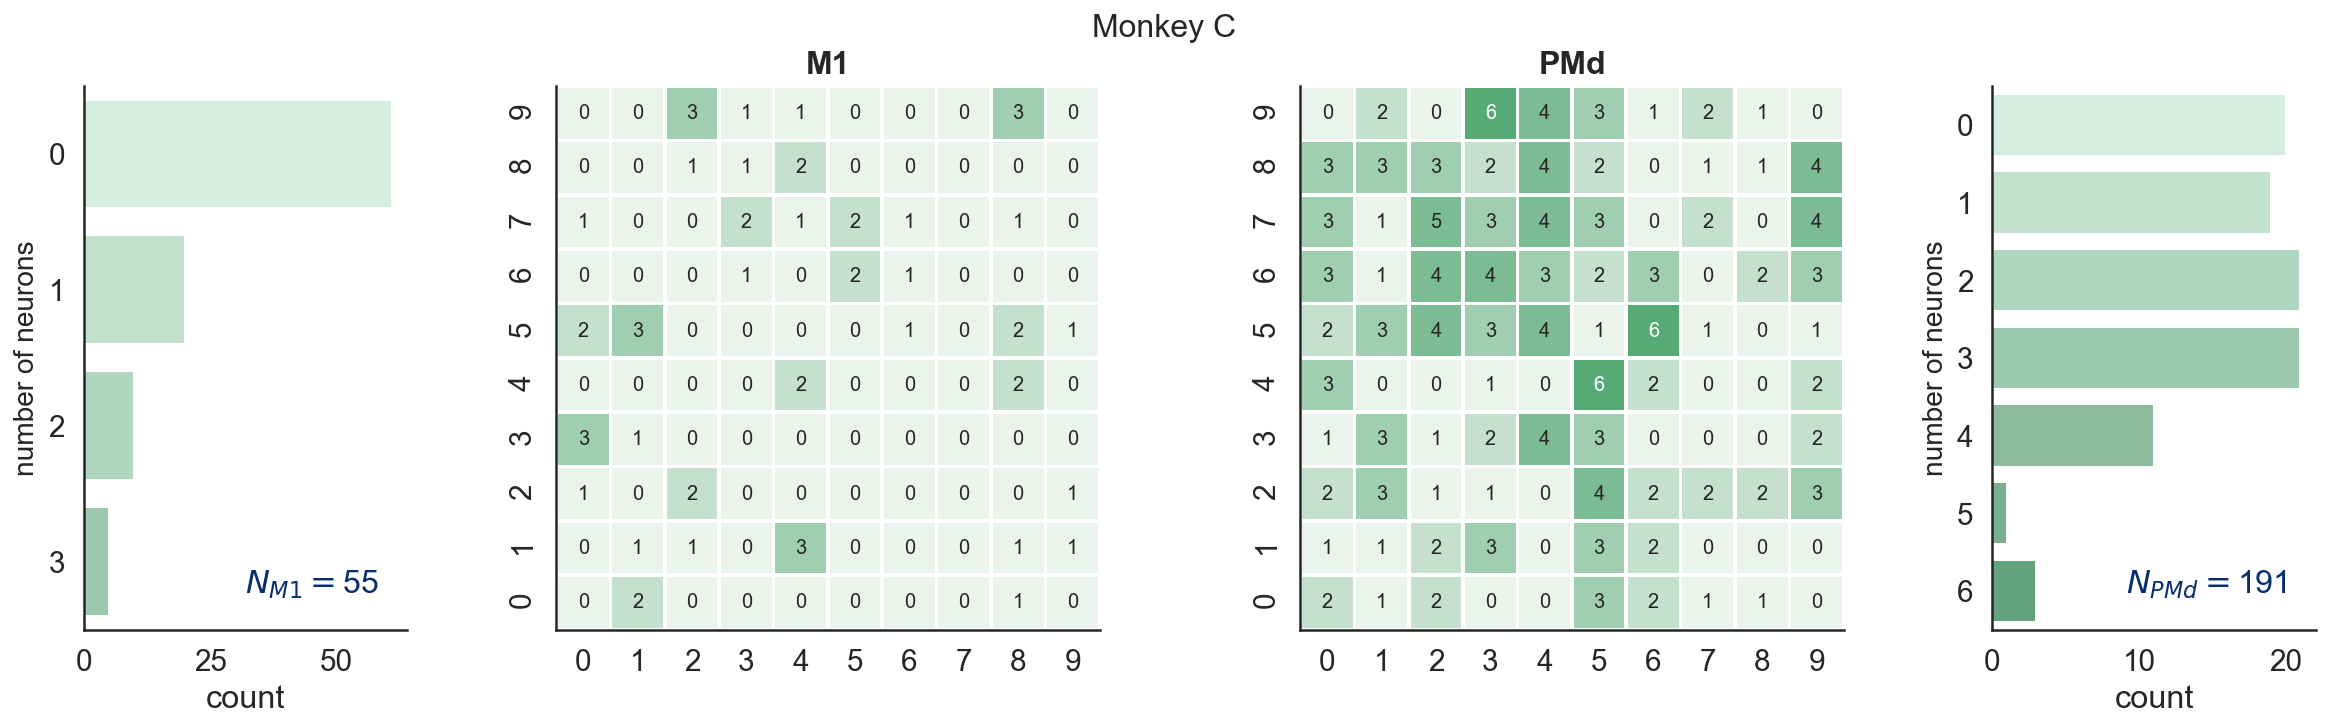

In [6]:
'''
Generate figure
'''

fig, axs = plt.subplots(1, 4, figsize=(20, 5), gridspec_kw={'width_ratios':[1, 2, 2, 1]})
fig.suptitle(f'Monkey {s_monkey}', fontsize=16, y=0.98)

# Countplots on the side
sns.countplot(y=0, data=df_m1_cell_distrib, orient='h', ax=axs[0])
axs[0].set_ylabel('number of neurons', fontsize=14)
at1 = AnchoredText('$N_{M1} =$' + f'{sum(m1_cell_distrib)}', prop=dict(size=16, color='#062D6D'), frameon=False, loc='lower right',)
axs[0].add_artist(at1)

sns.countplot(y=0, data=df_pmd_cell_distrib, orient='h', ax=axs[3])
axs[3].set_ylabel('number of neurons', fontsize=14)
at2 = AnchoredText('$N_{PMd} =$' + f'{sum(pmd_cell_distrib)}', prop=dict(size=16, color='#062D6D'), frameon=False, loc='lower right')
axs[3].add_artist(at2)

# Heatmaps in the middle
axs[1].set_title('M1', fontsize=16, fontweight='bold')
sns.heatmap(m1_cells_on_arr, cmap=gr_cmap, annot=True, square=True, linewidths=1.3, cbar=False, vmin=0, vmax=8, ax=axs[1])
axs[1].set_ylim([0,10]) # set the ylim to bottom, top

axs[2].set_title('PMd', fontsize=16, fontweight='bold')
sns.heatmap(pmd_cells_on_arr, cmap=gr_cmap, annot=True, square=True, linewidths=1.3, cbar=False, vmin=0, vmax=8, ax=axs[2])
axs[2].set_ylim([0, 10]) # set the ylim to bottom, top

sns.despine()

### Spatial distance within MAE

In [7]:
# Pick two electrodes
source_e_mid = 54
source_e_corner = 7
D_to_source_e_mid = np.zeros_like(m1_emap)
D_to_source_e_corner = np.zeros_like(m1_emap)

for j in range(1, 97):
    source_loc_mid = np.array(np.where(m1_emap == source_e_mid))
    target_loc = np.array(np.where(m1_emap == j)) 
    D_to_source_e_mid[np.where(m1_emap == j)] = np.linalg.norm(source_loc_mid - target_loc)
    
for j in range(1, 97):
    source_loc_corner = np.array(np.where(m1_emap == source_e_corner))
    target_loc = np.array(np.where(m1_emap == j)) 
    D_to_source_e_corner[np.where(m1_emap == j)] = np.linalg.norm(source_loc_corner - target_loc)  

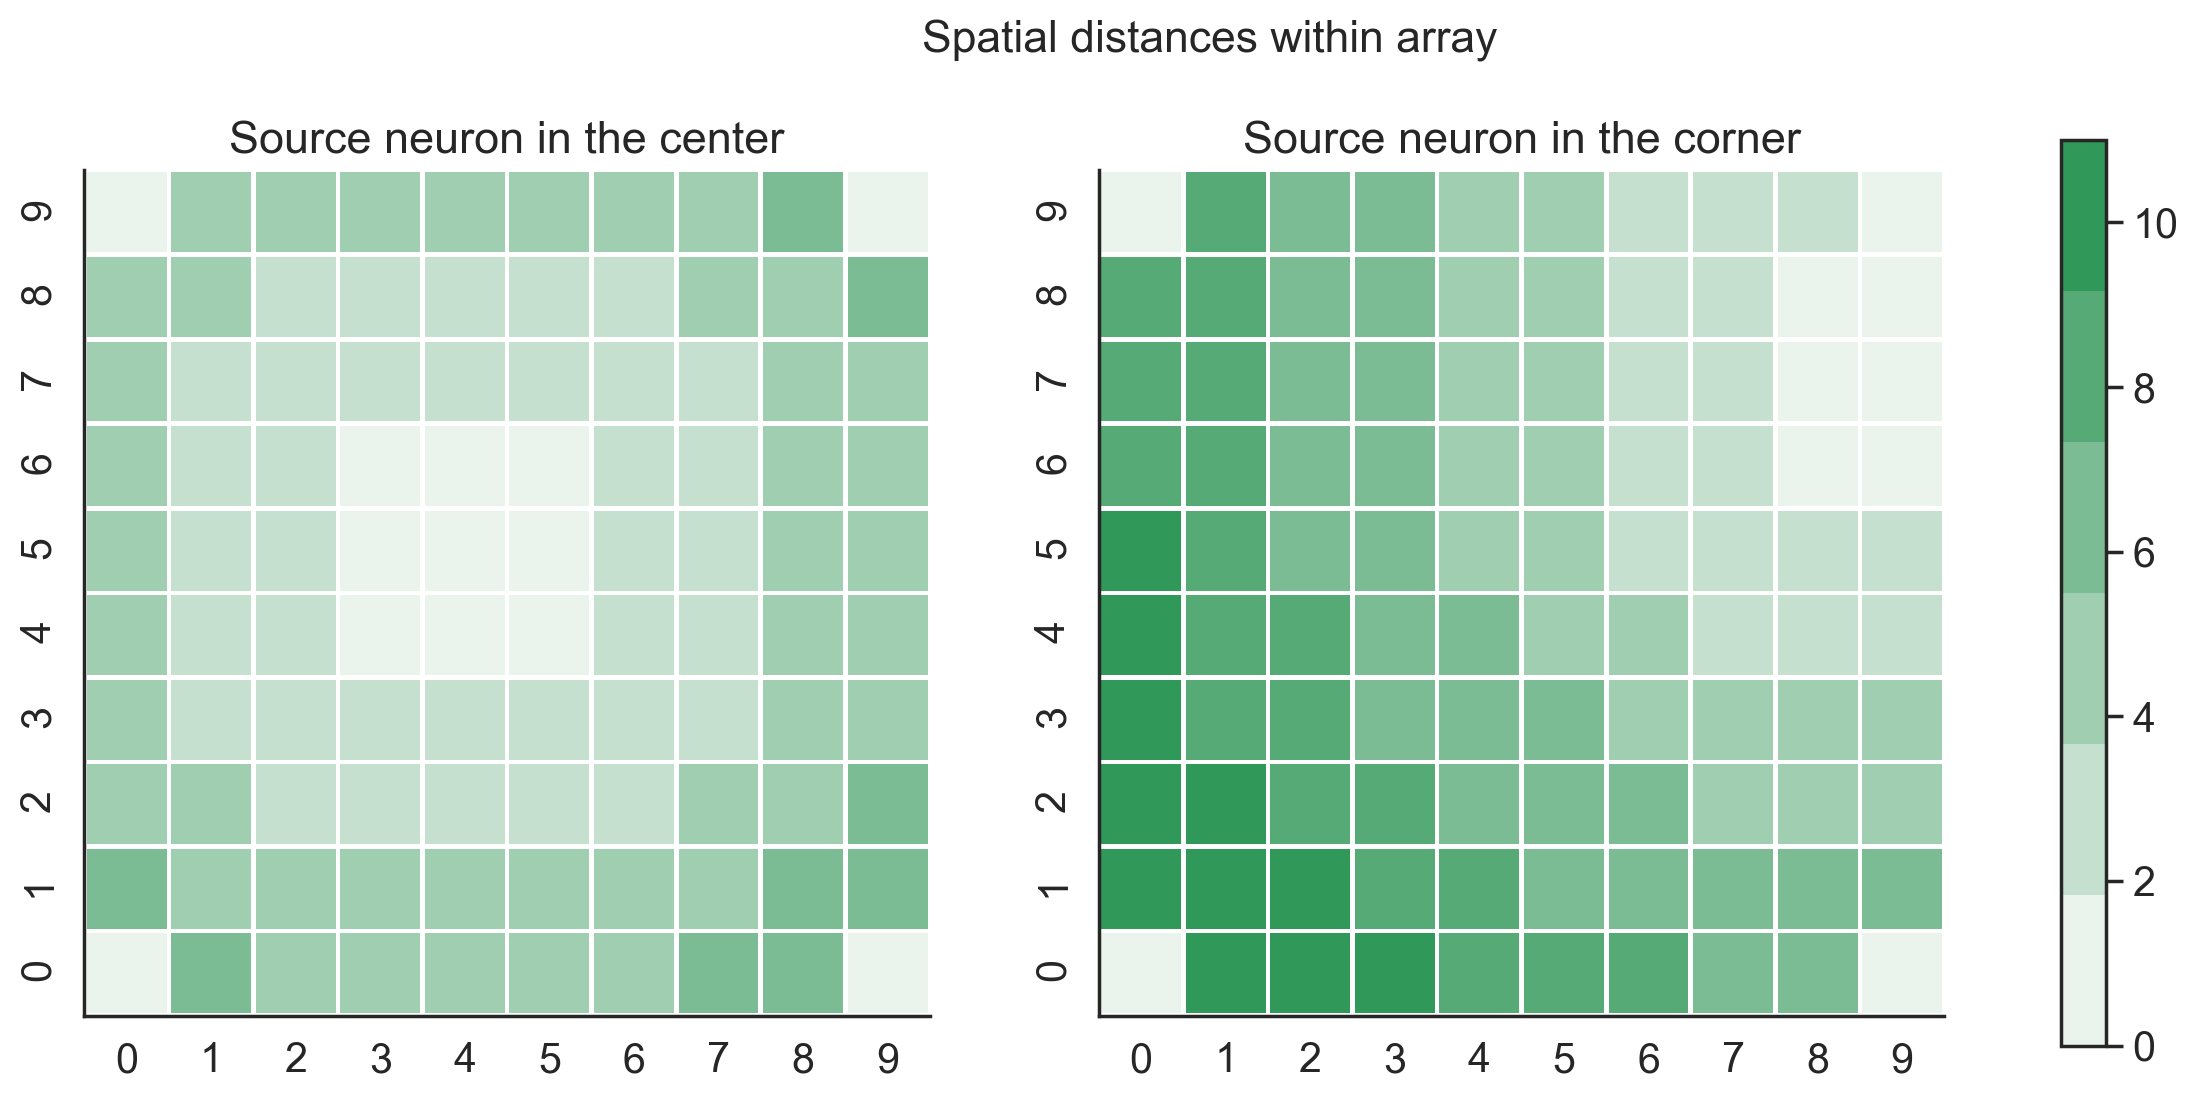

In [11]:
plt.rcParams['font.size'] = 13
cs = ['#D1F2DE', '#B6E3C8', '#9BD4B1', '#81C59B', '#66B685', '#4BA76E', '#309858']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cs)

fig, axs = plt.subplots(1, 2, figsize=(15, 6), dpi=100)

fig.suptitle('Spatial distances within array', fontsize=16)
axs[0].set_title('Source neuron in the center')
cb = sns.heatmap(D_to_source_e_mid, cmap=gr_cmap, annot=False, square=True, linewidths=1.3, 
            cbar=False, vmin=0, vmax=11, ax=axs[0])
axs[0].set_ylim([0,10]) # set the ylim to bottom, top
# axs[0].vlines([4, 5], 5, 6,  color='#2978F8', linewidth=3)
# axs[0].hlines([5, 6], 4, 5,  color='#2978F8', linewidth=3)

axs[1].set_title('Source neuron in the corner')
sns.heatmap(D_to_source_e_corner, cmap=gr_cmap, annot=False, square=True, linewidths=1.3, 
            cbar_kws={'orientation': 'horizontal'}, cbar=False, vmin=0, vmax=11, ax=axs[1])
axs[1].set_ylim([0, 10]) # set the ylim to bottom, top
# axs[1].vlines([9, 10], 7, 8,  color='#2978F8', linewidth=3)
# axs[1].hlines([7, 8], 9, 10,   color='#2978F8', linewidth=3)

mappable = cb.get_children()[0]
plt.colorbar(mappable, ax = [axs[0], axs[1]], orientation='vertical')
sns.despine()